# Circuit

In [1]:
from pytket.circuit.display import render_circuit_jupyter

from lambeq import AtomicType, BobcatParser, IQPAnsatz

N = AtomicType.NOUN
S = AtomicType.SENTENCE

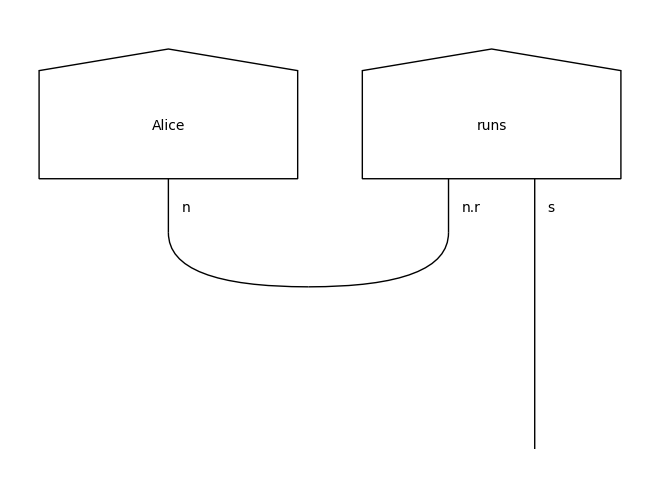

In [2]:
parser = BobcatParser()
diagram = parser.sentence2diagram('Alice runs')
diagram.draw()

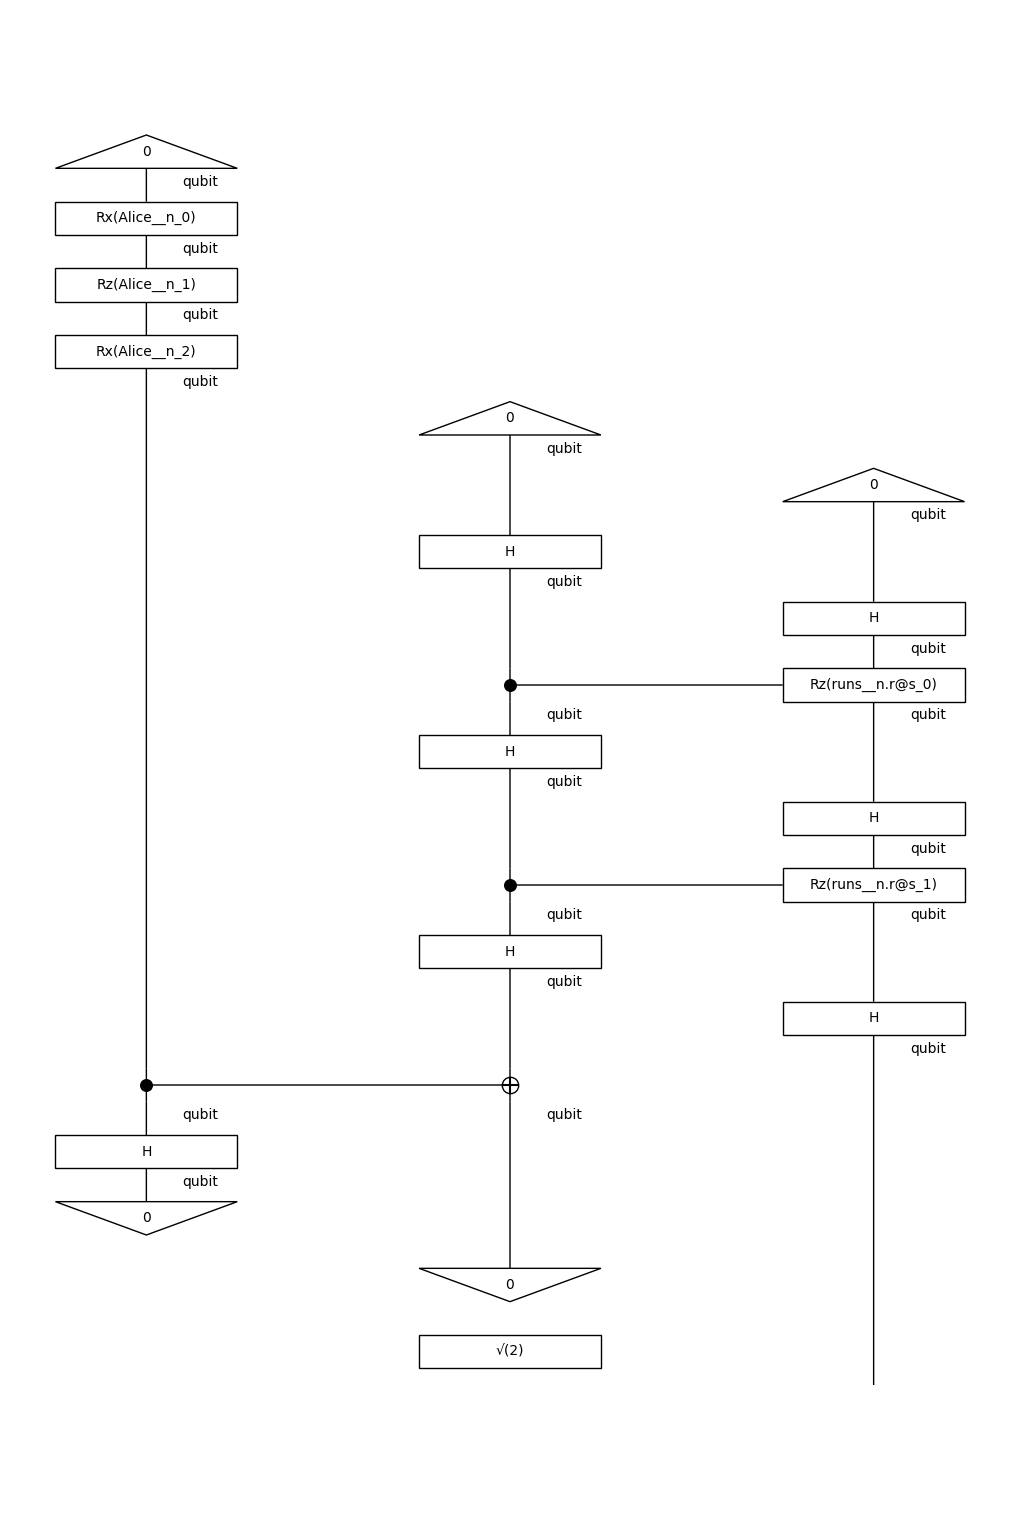

In [3]:
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
circuit = ansatz(diagram)
circuit.draw(figsize=(10, 15))

In [4]:
tket_circuit = ansatz(diagram).to_tk()

# This does not render properly on GitHub, please view it at:
# https://cqcl.github.io/lambeq/examples/circuit.html
render_circuit_jupyter(tket_circuit)

In [5]:
from sympy import default_sort_key

# Make sure you sort your symbols as they are returned as a set.
parameters = sorted(tket_circuit.free_symbols(), key=default_sort_key)

param_dict = {p: i * 0.001 for i, p in enumerate(parameters)}
param_dict

{Alice__n_0: 0.0,
 Alice__n_1: 0.001,
 Alice__n_2: 0.002,
 runs__n.r@s_0: 0.003,
 runs__n.r@s_1: 0.004}

In [6]:
tket_circuit.symbol_substitution(param_dict)

# This does not render properly on GitHub, please view it at:
# https://cqcl.github.io/lambeq/examples/circuit.html
render_circuit_jupyter(tket_circuit)